# Student Information

Name: 李清濬

Student ID: C110110225

GitHub ID: AtilaJack

In [127]:
!pip install datasets

In [128]:
import nltk

"""
Helper functions for data mining lab session 2018 Fall Semester
Author: Elvis Saravia
Email: ellfae@gmail.com
"""
class dmh:
  def format_rows(docs):
      """ format the text field and strip special characters """
      D = []
      for d in docs.data:
          temp_d = " ".join(d.split("\n")).strip('\n\t')
          D.append([temp_d])
      return D

  def format_labels(target, docs):
      """ format the labels """
      return docs.target_names[target]

  def check_missing_values(row):
      """ functions that check and verifies if there are missing values in dataframe """
      counter = 0
      for element in row:
          if element == True:
              counter+=1
      return ("The amoung of missing records is: ", counter)

  def tokenize_text(text, remove_stopwords=False):
      """
      Tokenize text using the nltk library
      """
      tokens = []
      for d in nltk.sent_tokenize(text, language='english'):
          for word in nltk.word_tokenize(d, language='english'):
              # filters here
              tokens.append(word)
      return tokens

In [129]:
from datasets import load_dataset

ds = load_dataset("Senem/Nostalgic_Sentiment_Analysis_of_YouTube_Comments_Data")
ds

DatasetDict({
    train: Dataset({
        features: ['sentiment', 'comment'],
        num_rows: 1500
    })
})

In [130]:
import pandas as pd

# Assuming 'ds' is your DatasetDict loaded as in the previous code
# Access the specific split (e.g., 'train') you want to convert
train_data = ds['train']

# Convert the dataset to a pandas DataFrame
X = pd.DataFrame(train_data)

# Now you can work with the DataFrame 'df'
print(X.head())

       sentiment                                            comment
0  not nostalgia  He was a singer with a golden voice that I lov...
1      nostalgia  The mist beautiful voice ever I listened to hi...
2      nostalgia  I have most of Mr. Reeves songs.  Always love ...
3  not nostalgia  30 day leave from 1st tour in Viet Nam to conv...
4      nostalgia  listening to his songs reminds me of my mum wh...


In [131]:
# 檢查有無缺失值
X.isnull().apply(lambda x: dmh.check_missing_values(x))

,sentiment,comment
0,The amoung of missing records is:,The amoung of missing records is:
1,0,0


In [132]:
# 將sentiment換成category_name comment換成text
X = X.rename(columns = {'sentiment':'category_name'})
X = X.rename(columns = {'comment':'text'})
X.head()

,category_name,text
0,not nostalgia,He was a singer with a golden voice that I lov...
1,nostalgia,The mist beautiful voice ever I listened to hi...
2,nostalgia,I have most of Mr. Reeves songs. Always love ...
3,not nostalgia,30 day leave from 1st tour in Viet Nam to conv...
4,nostalgia,listening to his songs reminds me of my mum wh...


category_name
not nostalgia    750
nostalgia        750
Name: count, dtype: int64


<Axes: title={'center': 'Category distribution'}, xlabel='category_name'>

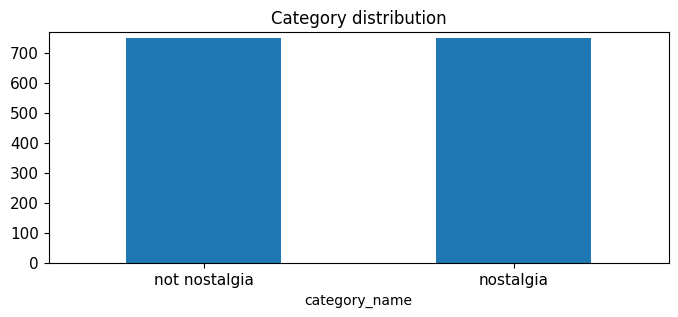

In [133]:
# 查看類別分布
print(X.category_name.value_counts())
X.category_name.value_counts().plot(kind = 'bar',title = 'Category distribution',ylim = [0, X.category_name.value_counts().max()+20],rot = 0, fontsize = 11, figsize = (8,3))

In [134]:
# 確認是否出現重複樣本
# 62、78筆為重複樣本
duplicates = X[X.duplicated(keep=False)]
duplicates

,category_name,text
62,not nostalgia,never heard this song before... WOW What an am...
78,not nostalgia,never heard this song before... WOW What an am...


In [135]:
# 捨去其中一筆
X.drop_duplicates(inplace = True)
len(X)

1499

In [136]:
# 新的類別分布
print(X.category_name.value_counts())

category_name
nostalgia        750
not nostalgia    749
Name: count, dtype: int64


In [137]:
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


True

In [138]:
# 將文字進行tokenize
X['unigrams'] = X['text'].apply(lambda x: dmh.tokenize_text(x))
X.head()

,category_name,text,unigrams
0,not nostalgia,He was a singer with a golden voice that I lov...,"[He, was, a, singer, with, a, golden, voice, t..."
1,nostalgia,The mist beautiful voice ever I listened to hi...,"[The, mist, beautiful, voice, ever, I, listene..."
2,nostalgia,I have most of Mr. Reeves songs. Always love ...,"[I, have, most, of, Mr., Reeves, songs, ., Alw..."
3,not nostalgia,30 day leave from 1st tour in Viet Nam to conv...,"[30, day, leave, from, 1st, tour, in, Viet, Na..."
4,nostalgia,listening to his songs reminds me of my mum wh...,"[listening, to, his, songs, reminds, me, of, m..."


In [139]:
# 創建document-term matrix
from sklearn.feature_extraction.text import CountVectorizer
count_vect = CountVectorizer()
X_counts = count_vect.fit_transform(X.text) #learn the vocabulary and return document-term matrix
print("document-term matrix 大小 : ",X_counts.shape)
print(X_counts[0])

document-term matrix 大小 :  (1499, 3730)
  (0, 1598)	1
  (0, 3570)	2
  (0, 2973)	1
  (0, 3650)	1
  (0, 1470)	1
  (0, 3534)	1
  (0, 3282)	1
  (0, 2028)	1
  (0, 3336)	1
  (0, 1606)	1
  (0, 233)	2
  (0, 3284)	3
  (0, 3328)	2
  (0, 1651)	2
  (0, 1512)	1
  (0, 1249)	1
  (0, 323)	1
  (0, 214)	1
  (0, 2341)	1
  (0, 15)	1
  (0, 1733)	1
  (0, 3304)	1
  (0, 907)	1
  (0, 258)	2
  (0, 3124)	1
  (0, 2328)	2
  (0, 245)	1
  (0, 3581)	1
  (0, 1591)	1
  (0, 2082)	1
  (0, 2974)	1
  (0, 573)	1
  (0, 593)	1
  (0, 3538)	1
  (0, 1347)	2
  (0, 1833)	1
  (0, 2671)	1
  (0, 3713)	2
  (0, 1272)	1
  (0, 2688)	1
  (0, 1125)	1
  (0, 2035)	1
  (0, 3278)	1
  (0, 2018)	1
  (0, 1964)	1


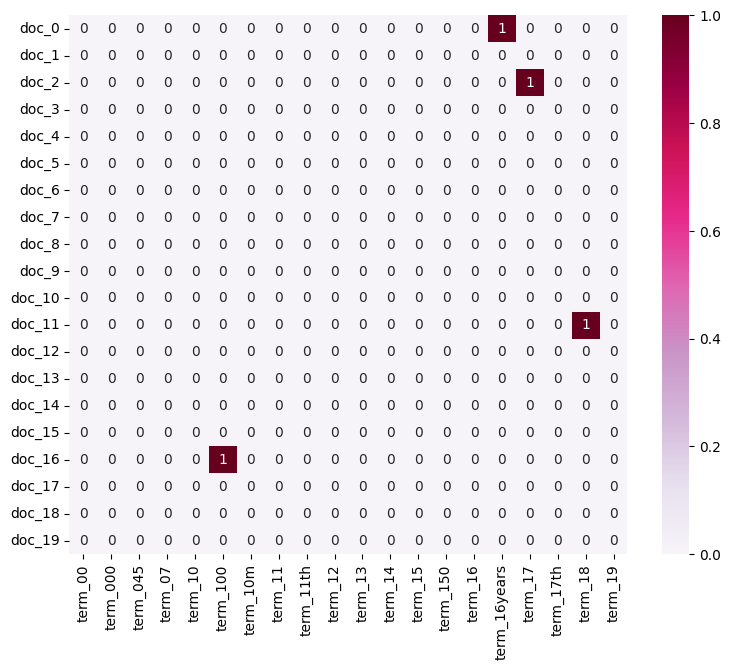

In [140]:
#可視化document-term matrix

# first twenty features only
plot_x = ["term_"+str(i) for i in count_vect.get_feature_names_out()[0:20]]
# obtain document index
plot_y = ["doc_"+ str(i) for i in list(X.index)[0:20]]
plot_z = X_counts[0:20, 0:20].toarray() #X_counts[how many documents, how many terms]

import seaborn as sns
import matplotlib.pyplot as plt
df_todraw = pd.DataFrame(plot_z, columns = plot_x, index = plot_y)
plt.subplots(figsize=(9, 7))
ax = sns.heatmap(df_todraw,
cmap="PuRd",
vmin=0, vmax=1, annot=True)

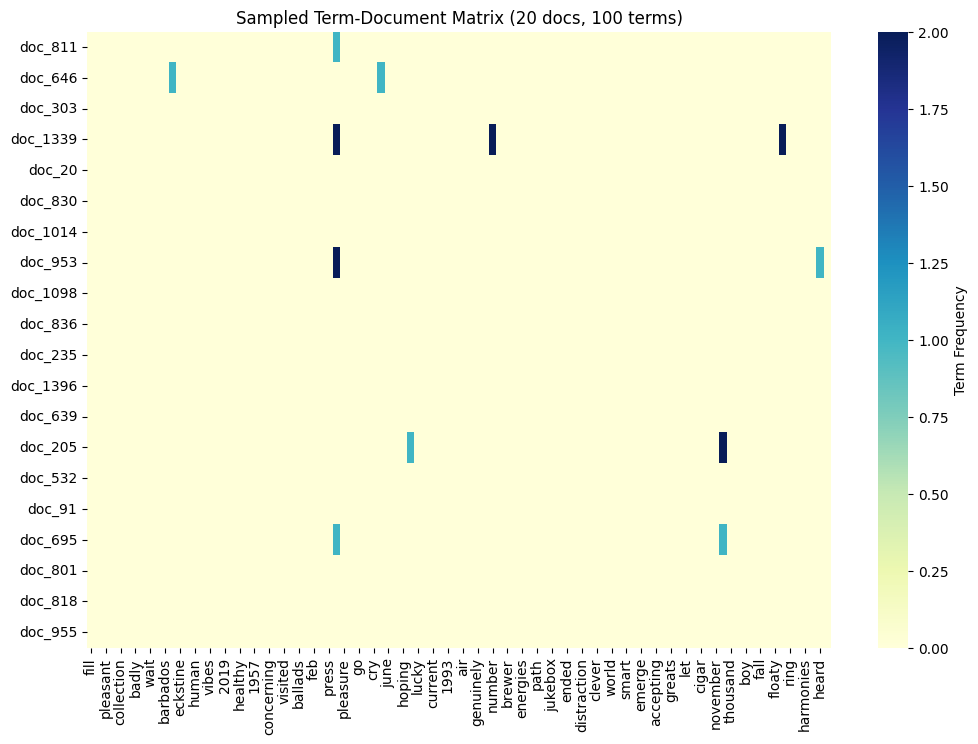

In [141]:
# 進行另一種可視化方式，隨機抽樣20筆data，隨機抽樣100個tern，且用顏色代表出現頻率，不會出現過多的0導致視覺混亂
import random

# Efficient visualization of a large term-document matrix
def visualize_sparse_matrix(X_counts, count_vect, num_docs, num_terms):

    # Sample documents and terms randomly for efficiency
    sampled_docs = random.sample(range(X_counts.shape[0]), min(num_docs, X_counts.shape[0]))
    sampled_terms = random.sample(range(len(count_vect.get_feature_names_out())), min(num_terms, len(count_vect.get_feature_names_out())))

    # Extract the sampled data from the term-document matrix
    plot_x = [count_vect.get_feature_names_out()[i] for i in sampled_terms]
    plot_y = ["doc_" + str(i) for i in sampled_docs]
    plot_z = X_counts[sampled_docs, :][:, sampled_terms].toarray()

    # Create a DataFrame for plotting
    df_todraw = pd.DataFrame(plot_z, columns=plot_x, index=plot_y)

    # Use a more suitable colormap for sparsity visualization
    plt.subplots(figsize=(12, 8))  # Adjust figure size for better visibility
    ax = sns.heatmap(df_todraw, cmap="YlGnBu", vmin=0, annot=False, cbar_kws={'label': 'Term Frequency'})  # Use annot=False for larger matrices
    ax.set_title(f"Sampled Term-Document Matrix ({num_docs} docs, {num_terms} terms)")
    plt.show()


# Example usage with a sample of 100 documents and 200 terms:
visualize_sparse_matrix(X_counts, count_vect, num_docs=20, num_terms=100)

<ipython-input-142-1cf9136c31b2>:11: UserWarning:

set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.



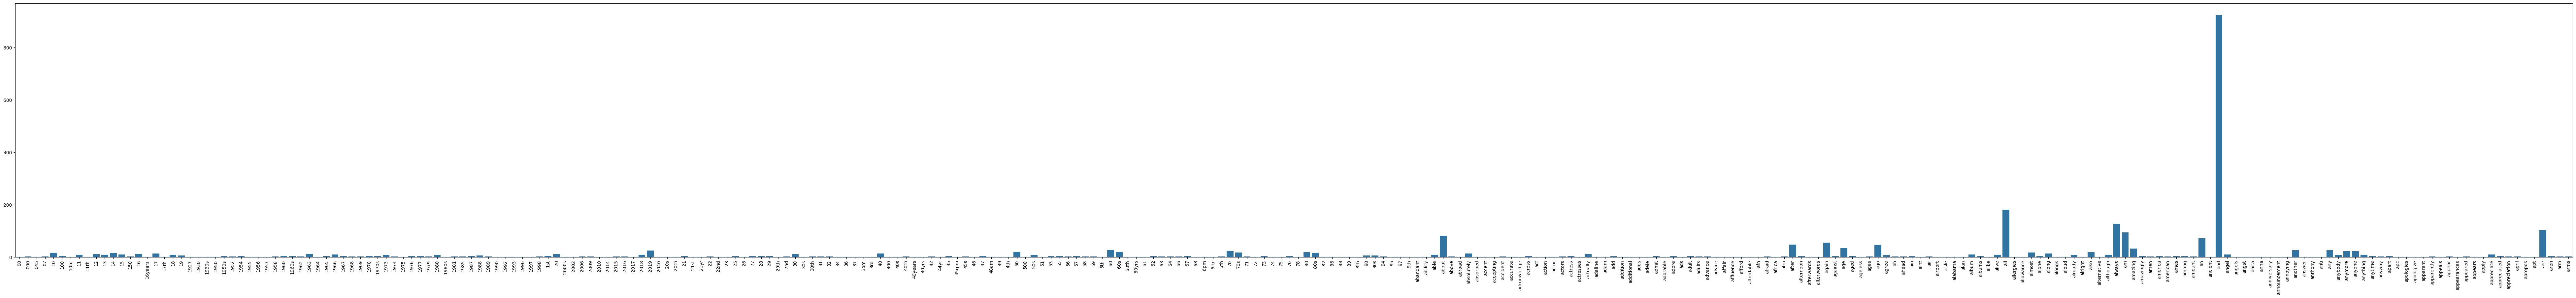

In [142]:
# 觀察前300個term出現的比例
import numpy as np
term_frequencies = []
for j in range(0,X_counts.shape[1]):
  term_frequencies.append(sum(X_counts[:,j].toarray()))
term_frequencies = np.asarray(X_counts.sum(axis=0))[0]
plt.subplots(figsize=(100, 10))
g = sns.barplot(x=count_vect.get_feature_names_out()[:300],

y=term_frequencies[:300])
g.set_xticklabels(count_vect.get_feature_names_out()[:300], rotation = 90);


In [143]:
import plotly.graph_objects as go

# 假設有以下數據
x_values = count_vect.get_feature_names_out()[:300]
y_values = term_frequencies[:300]

# 創建圖形
fig = go.Figure(data=[
    go.Bar(x=x_values, y=y_values)
])

# 設置圖表的大小和標題
fig.update_layout(
    title='Bar Plot of Term Frequencies',
    xaxis_title='Terms',
    yaxis_title='Frequency',
    xaxis=dict(tickangle=90),
    height=1000,  # 設置圖表高度
    width=800  # 設置圖表寬度
)

# 顯示圖表
fig.show()


In [144]:
# 長尾圖

# Sort the terms and frequencies based on frequencies in descending order
sorted_term_frequencies = sorted(zip(count_vect.get_feature_names_out()[:300], term_frequencies[:300]), key=lambda x: x[1], reverse=True)

# Separate the terms and frequencies after sorting
sorted_x_values = [term for term, freq in sorted_term_frequencies]
sorted_y_values = [freq for term, freq in sorted_term_frequencies]

# Create the Plotly bar chart
fig = go.Figure(data=[go.Bar(x=sorted_x_values, y=sorted_y_values)])

# Customize the layout
fig.update_layout(
    title="Term Frequencies (Sorted by Frequency)",
    xaxis_title="Terms",
    yaxis_title="Frequency",
    xaxis=dict(tickangle=90),
    height=600,  # Adjust height as needed
    width=1000  # Adjust width as needed
)

fig.show()


In [145]:
# term_frequencies_log

import math
term_frequencies_log = [math.log(i) for i in term_frequencies]
# Sort the terms and log frequencies based on log frequencies in descending order
sorted_term_frequencies_log = sorted(zip(count_vect.get_feature_names_out()[:300], term_frequencies_log[:300]), key=lambda x: x[1], reverse=True)

# Separate the terms and log frequencies after sorting
sorted_x_values_log = [term for term, freq in sorted_term_frequencies_log]
sorted_y_values_log = [freq for term, freq in sorted_term_frequencies_log]

# Create the Plotly bar chart
fig = go.Figure(data=[go.Bar(x=sorted_x_values_log, y=sorted_y_values_log)])

# Customize the layout
fig.update_layout(
    title="Term Frequencies (Log, Sorted by Frequency)",
    xaxis_title="Terms",
    yaxis_title="Log Frequency",
    xaxis=dict(tickangle=90),
    height=600,  # Adjust height as needed
    width=1000  # Adjust width as needed
)

fig.show()

In [146]:
%load_ext autoreload
%autoreload 2


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [147]:
!pip install umap
!pip install --upgrade umap-learn

In [149]:
!pip install umap-learn==0.5.3


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 88.2/88.2 kB 2.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for umap-learn: filename=umap_learn-0.5.3-py3-none-any.whl size=82808 sha256=001c5878b34f29bbf0c075b8cfa0ec327dfcd00214aa257ec6aa69d90c01d040
  Stored in directory: /root/.cache/pip/wheels/a0/e8/c6/a37ea663620bd5200ea1ba0907ab3c217042c1d035ef606acc
Successfully built umap-learn
  Attempting uninstall: umap-learn
    Found existing installation: umap-learn 0.5.7
    Uninstalling umap-learn-0.5.7:
      Successfully uninstalled umap-learn-0.5.7


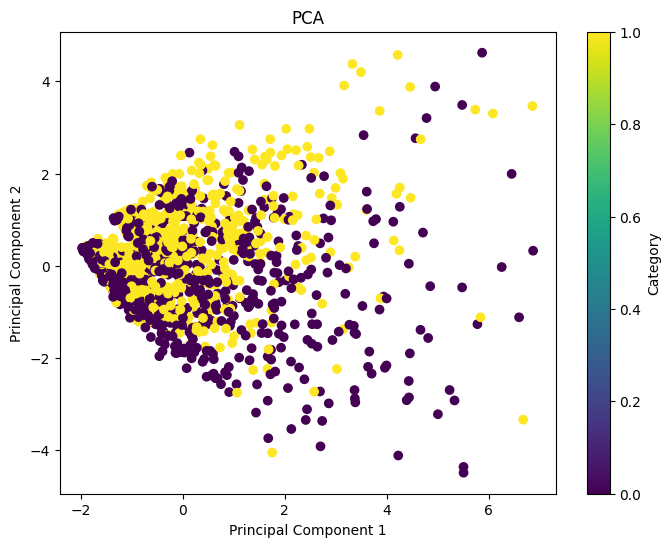

/usr/local/lib/python3.10/dist-packages/sklearn/manifold/_t_sne.py:1162: FutureWarning:

'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.



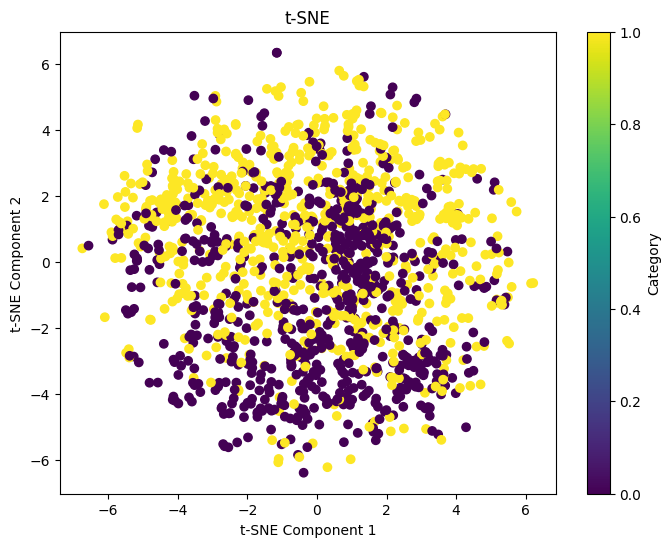

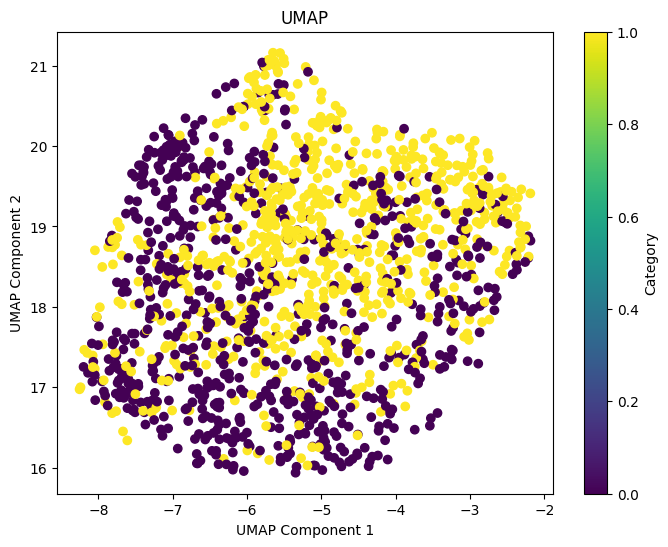

In [151]:
# prompt: Create scatter plots for PCA, t-SNE, and UMAP

from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import umap

# Assuming X_counts is your document-term matrix
# and X is your original DataFrame

# PCA
pca = PCA(n_components=2)  # Reduce to 2 dimensions
X_pca = pca.fit_transform(X_counts.toarray())

plt.figure(figsize=(8, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=X['category_name'].astype('category').cat.codes) # Color by category
plt.title('PCA')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.colorbar(label='Category')
plt.show()


# t-SNE
tsne = TSNE(n_components=2, perplexity=30, n_iter=300, random_state=42) # Adjust perplexity and n_iter as needed
X_tsne = tsne.fit_transform(X_counts.toarray())

plt.figure(figsize=(8, 6))
plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=X['category_name'].astype('category').cat.codes)
plt.title('t-SNE')
plt.xlabel('t-SNE Component 1')
plt.ylabel('t-SNE Component 2')
plt.colorbar(label='Category')
plt.show()


# UMAP
reducer = umap.UMAP(n_components=2, random_state=42) # Adjust parameters as needed
X_umap = reducer.fit_transform(X_counts.toarray())

plt.figure(figsize=(8, 6))
plt.scatter(X_umap[:, 0], X_umap[:, 1], c=X['category_name'].astype('category').cat.codes)
plt.title('UMAP')
plt.xlabel('UMAP Component 1')
plt.ylabel('UMAP Component 2')
plt.colorbar(label='Category')
plt.show()

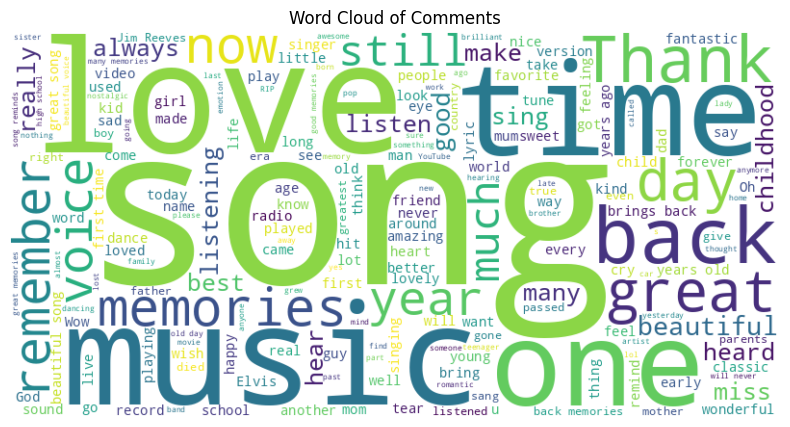

In [152]:
# Interactive PCA、t-SNE、 UMAP Plot with Plotly。
# Wordcloud Visualization
# Distribution of comment lengths

import plotly.express as px

# Assuming X_pca, X_tsne, X_umap, and X are defined as in your provided code

# Interactive PCA Plot with Plotly
fig_pca = px.scatter(x=X_pca[:, 0], y=X_pca[:, 1], color=X['category_name'],
                     labels={'x': 'Principal Component 1', 'y': 'Principal Component 2'},
                     title='Interactive PCA Visualization')
fig_pca.show()


# Interactive t-SNE Plot with Plotly
fig_tsne = px.scatter(x=X_tsne[:, 0], y=X_tsne[:, 1], color=X['category_name'],
                      labels={'x': 't-SNE Component 1', 'y': 't-SNE Component 2'},
                      title='Interactive t-SNE Visualization')
fig_tsne.show()

# Interactive UMAP Plot with Plotly
fig_umap = px.scatter(x=X_umap[:, 0], y=X_umap[:, 1], color=X['category_name'],
                      labels={'x': 'UMAP Component 1', 'y': 'UMAP Component 2'},
                      title='Interactive UMAP Visualization')
fig_umap.show()


# Wordcloud Visualization (requires wordcloud library)
!pip install wordcloud
from wordcloud import WordCloud

text = " ".join(X['text'].astype(str))
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title("Word Cloud of Comments")
plt.show()

# Distribution of comment lengths
X['comment_length'] = X['text'].str.len()
fig_length = px.histogram(X, x='comment_length', color='category_name',
                          title='Distribution of Comment Lengths by Category',
                          nbins=50,  # Adjust number of bins
                          labels={'comment_length': 'Comment Length'})
fig_length.show()

In [156]:
# TF-IDF

from sklearn.feature_extraction.text import TfidfVectorizer

# Assuming X.text contains your preprocessed text data
tfidf_vectorizer = TfidfVectorizer()
X_tfidf = tfidf_vectorizer.fit_transform(X['text'])

print("TF-IDF matrix shape:", X_tfidf.shape)
X_tfidf[0]

TF-IDF matrix shape: (1499, 3730)


<1x3730 sparse matrix of type '<class 'numpy.float64'>'
	with 45 stored elements in Compressed Sparse Row format>

In [157]:
# Naive bayes

from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report

# Split data into training and testing sets
X_train_counts, X_test_counts, y_train, y_test = train_test_split(
    X_counts, X['category_name'], test_size=0.2, random_state=42
)
X_train_tfidf, X_test_tfidf, _, _ = train_test_split(
    X_tfidf, X['category_name'], test_size=0.2, random_state=42
)


# Train and evaluate the Naive Bayes classifier using word frequencies
nb_classifier_counts = MultinomialNB()
nb_classifier_counts.fit(X_train_counts, y_train)
y_pred_counts = nb_classifier_counts.predict(X_test_counts)
print("Classification Report (Word Frequencies):")
print(classification_report(y_test, y_pred_counts))


# Train and evaluate the Naive Bayes classifier using TF-IDF features
nb_classifier_tfidf = MultinomialNB()
nb_classifier_tfidf.fit(X_train_tfidf, y_train)
y_pred_tfidf = nb_classifier_tfidf.predict(X_test_tfidf)
print("\nClassification Report (TF-IDF):")
print(classification_report(y_test, y_pred_tfidf))

Classification Report (Word Frequencies):
               precision    recall  f1-score   support

    nostalgia       0.81      0.94      0.87       158
not nostalgia       0.92      0.76      0.83       142

     accuracy                           0.85       300
    macro avg       0.86      0.85      0.85       300
 weighted avg       0.86      0.85      0.85       300


Classification Report (TF-IDF):
               precision    recall  f1-score   support

    nostalgia       0.81      0.93      0.86       158
not nostalgia       0.91      0.75      0.82       142

     accuracy                           0.85       300
    macro avg       0.86      0.84      0.84       300
 weighted avg       0.85      0.85      0.85       300

